In [1]:
from wordcloud import WordCloud, STOPWORDS  # Used for Visual representation of the text data
import matplotlib.pyplot as plt 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
%matplotlib inline  
import seaborn as sns # Visualization 

import numpy as np # linear algebra
import pandas as pd #data processing

import os # Operating System
import re # Regular Expression
import nltk # Natural Language Toolkit

In [2]:
#importing the dataset 

train=pd.read_csv('./fake-news/train.csv')
test=pd.read_csv('./fake-news/test.csv')

In [3]:
# Checking the top 10 value of the dataset

train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [5]:
train.sample(10)

,id,title,author,text,label
4362,4362,AP fakes the news,Gillian,"*Sent:* Tuesday, August 11, 2015 6:00 PM *To:*...",1
1588,1588,Assange Demands Sweden Drop Arrest Warrant,Breitbart London,STOCKHOLM (AFP) — WikiLeaks founder Julian ...,0
16645,16645,In the end times a man's enemies will be the m...,The Prophet (UID 58565188),In the end times a man's enemies will be the m...,1
14711,14711,The Unethicality of the Sore Loser,Kim Petersen,Moving the goalposts on electoral criteria 34 ...,1
2593,2593,Combat Obesity with a Balance of Omega-3 and O...,Times Live,Combat Obesity with a Balance of Omega-3 and O...,1
1689,1689,Duterte Still Spiking US on Asian Political Tour,NaN,Duterte Still Spiking US on Asian Political To...,1
11234,11234,Protest by ‘equal rights for immigrants’ group...,Howard Portnoy,Print \nProtesters blocked the upper level of ...,1
13028,13028,Are you shitting me !! A dindu flavor 24 - 'Ja...,SuperTard,Are you shitting me !! A dindu flavor 24 - 'Ja...,1
18800,18800,New Sheriff in Town: The First 100 Days at the...,Ian Mason,Under the leadership of Attorney General Jeff ...,0
19720,19720,Parents Have Only 2 Hours to Show Dying Newbor...,Prudence Hill,Share on Twitter \nAlyssa had known that havin...,1


In [6]:
# Checking the null values in the train dataset

print(train.isnull().sum())


id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [7]:
# Checking the null values in the test dataset

print(test.isnull().sum())

id          0
title     122
author    503
text        7
dtype: int64


In [8]:
# Includding the missing data

test=test.fillna(' ')   # Pandas library fillna
train=train.fillna(' ')

# Merginf all the 3 columns into 1.

test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

# Creating Wordcloud Visuals

In [9]:
 # Importing the python library to visualiza textual data , for better understanding of the dataset.


real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

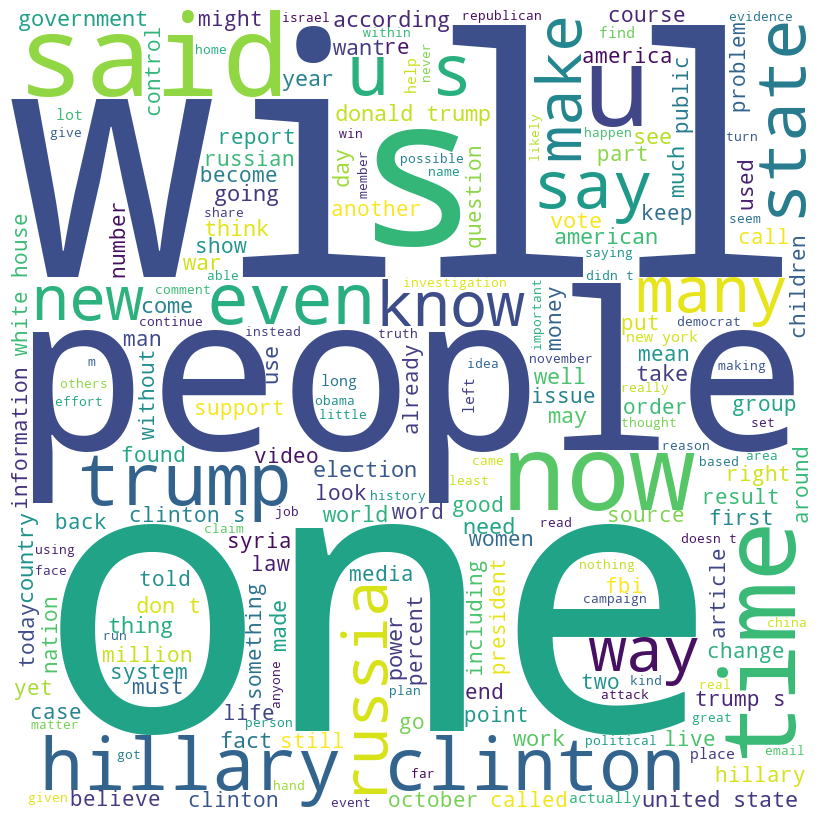

In [10]:
# Here it show the visual form of the fonts and it set's the size of the text according to it's occorence in the dataset. 
# This is for True Data


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

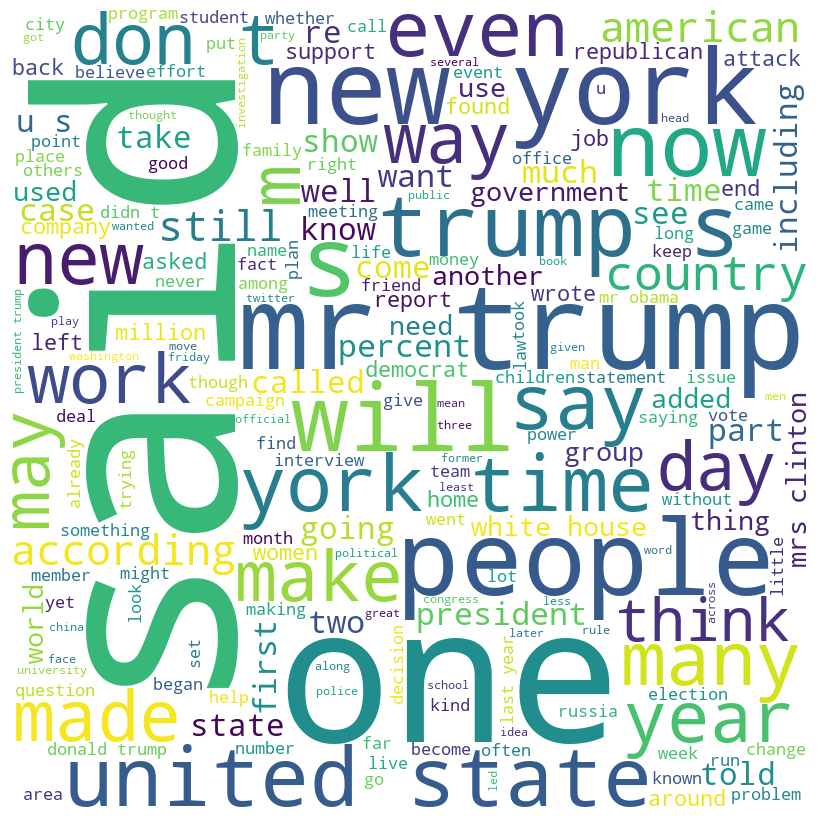

In [11]:
# This is for Fake data

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing 

# 1. Regex

In [12]:
#Removes punctuations from the String  

# Regex is based up on context free grammer 

s = "!</> hello $$ </>^!!!%%&&%$@@@^^^&&!& </>*@# &&\\ @@@##%^^&!@# %%$"

In [13]:

# we are going to select a substring from a string 
## If any sub string does not holds words or spaces then we are goind to replace that with a empty string

s = re.sub(r'[^\w\s]','',s)  
# w -> Words , s -> space , ^ -> not symbol

In [14]:
print(s)

 hello      


# 2. Tokenization

In [15]:
#Downloading nltk data

#Punkt Tokenizer is a pre-trained unsupervised machine learning model for tokenizing text into sentences

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.word_tokenize("Hello we are team Believer.")

['Hello', 'we', 'are', 'team', 'Believer', '.']

# 3. StopWords

In [17]:
# to remove the most continuesly comming words in the sentence or paragraph.

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# If i want to add any other character in the stopwords i can append it using  :
stop_words.append('hogbohbjdn')
stop_words.append(',')

In [20]:
sentence = "The sun sets over the horizon, painting the sky in hues of orange and pink"

In [21]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [22]:
words

['The', 'sun', 'sets', 'horizon', 'painting', 'sky', 'hues', 'orange', 'pink']

# 4. Lemmatization

Lemmatization is used to get a word to the root word , it is used for the following : Normalization of Words, Improved Analysis and Comparison, 
Better Feature Extraction, Enhanced Information Retrieval, Enhanced Readability, Support for WordNet and Semantic Analysis.

Stemming is the alternative of lemmatization  

Lemmatization is generally considered better than stemming in certain situations due to its more sophisticated approach to word normalization.

In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
input_str="The cats are running and jumping over the fences."

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Piyush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
#Tokenize the sentence



input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

The
cat
are
running
and
jumping
over
the
fence
.


# Applying all above algorithms 

In [25]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence


In [26]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...


In [27]:
train = train[['total','label']]

# Applying NLP Techniques

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
X_train = train['total']
Y_train = train['label']

# Bag-of-words / CountVectorizer

In [30]:

# in sklearn we import the bag-of-words model through countVectorizer
# countVectorizer can be called as the modified version of bag-of-words

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [31]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# TF-iDF Vectorizer

In [32]:

# It is normalizing 

def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [33]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [34]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

In [35]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [36]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

# Modelling

In [37]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

# Logistic Regression

Used Classifier such as Confusion matrix

In [38]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


array([[2493,   71],
       [  44, 2592]], dtype=int64)

# MultinomialNB

In [39]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

# Pipeline

In [40]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [41]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [43]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [44]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0], dtype=int64)

In [45]:
pipeline.predict(["PALO ALTO, Calif.  â€”   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trumpâ€™s election would â€œrange between disastrous and terrible. â€ Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of â€œangerâ€ and â€œbigotry. â€ Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trumpâ€™s candidacy even as other supporters flee. (He also recently gave $1 million to a â€œsuper PACâ€ that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valleyâ€™s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. â€œWeâ€™re a bunch of nerds not used to having a lot of limelight,â€ said Dave McClure, an investor who runs a tech incubator called 500 Startups. â€œBut to quote   â€˜With great power comes great responsibility. â€™â€ Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the â€œnerdzâ€ for small donations to match that sum. They have not come through yet. â€œWeâ€™re kind of optimistic weâ€™ll get the other $50, 000 in a few weeks,â€ Mr. McClure said. That relatively slow pace reflects Silicon Valleyâ€™s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valleyâ€™s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veteransâ€™ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffmanâ€™s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, â€œLooking at some PACs, etc. â€ He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. â€œI always focused on policy and avoided politics,â€ he said. â€œBut if Trump were elected president, I would be disappointed in myself for not acting. â€ When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was â€œprobable. â€ A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpacâ€™s head of communications, offered a possible reason for Mrs. Clintonâ€™s    support. â€œDonors give to support candidates they love, not to defeat candidates they fear,â€ he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  â€”   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the â€œ  or   gig economyâ€  â€”   Uber, Airbnb and their ilk  â€”   were â€œunleashing innovationâ€ but also â€œraising hard questions about workplace protection and what a good job will look like in the future. â€ The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that â€œthe benefits of technology and globalization have not been evenly distributed,â€ and that this needed to change. If Silicon Valleyâ€™s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. â€œNot only are tech people going to be wielding influence, but theyâ€™re going to be the candidate,â€ Mr. McClure said. â€œReid Hoffman, Sheryl Sandbergâ€  â€”   the chief operating officer of Facebook  â€”   â€œand a bunch of other folks here have political aspirations. â€ Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The groupâ€™s first billboard, said to be outside Pittsburgh, labeled her â€œToo Big to Jail. â€ Mr. Luckey told The Daily Beast that his thinking â€œwent along the lines of, â€˜Hey, I have a bunch of money. I would love to see more of this stuff. â€™â€ He added, â€œI thought it sounded like a real jolly good time. â€ Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. â€œIf weâ€™re going to be more vocal, weâ€™ll have to live more transparently,â€ said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. â€œThere will be a period of adjustment. â€ But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. â€œWe reached everyone we wanted to reach, and hopefully influenced opinions,â€ said Saar Gur, a CRV venture capitalist. â€œThen the buzz died down and we went back to our day jobs, which are super busy. â€"])

array([1], dtype=int64)

In [46]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [47]:
filename = './pipeline.sav'

# Prediction

In [48]:
loaded_model = joblib.load(filename)
result_0 = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result_0) 

[0]


In [49]:
loaded_model = joblib.load(filename)
result_1 = loaded_model.predict(["PALO ALTO, Calif.  â€”   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trumpâ€™s election would â€œrange between disastrous and terrible. â€ Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of â€œangerâ€ and â€œbigotry. â€ Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trumpâ€™s candidacy even as other supporters flee. (He also recently gave $1 million to a â€œsuper PACâ€ that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valleyâ€™s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. â€œWeâ€™re a bunch of nerds not used to having a lot of limelight,â€ said Dave McClure, an investor who runs a tech incubator called 500 Startups. â€œBut to quote   â€˜With great power comes great responsibility. â€™â€ Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the â€œnerdzâ€ for small donations to match that sum. They have not come through yet. â€œWeâ€™re kind of optimistic weâ€™ll get the other $50, 000 in a few weeks,â€ Mr. McClure said. That relatively slow pace reflects Silicon Valleyâ€™s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valleyâ€™s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veteransâ€™ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffmanâ€™s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, â€œLooking at some PACs, etc. â€ He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. â€œI always focused on policy and avoided politics,â€ he said. â€œBut if Trump were elected president, I would be disappointed in myself for not acting. â€ When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was â€œprobable. â€ A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpacâ€™s head of communications, offered a possible reason for Mrs. Clintonâ€™s    support. â€œDonors give to support candidates they love, not to defeat candidates they fear,â€ he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  â€”   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the â€œ  or   gig economyâ€  â€”   Uber, Airbnb and their ilk  â€”   were â€œunleashing innovationâ€ but also â€œraising hard questions about workplace protection and what a good job will look like in the future. â€ The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that â€œthe benefits of technology and globalization have not been evenly distributed,â€ and that this needed to change. If Silicon Valleyâ€™s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. â€œNot only are tech people going to be wielding influence, but theyâ€™re going to be the candidate,â€ Mr. McClure said. â€œReid Hoffman, Sheryl Sandbergâ€  â€”   the chief operating officer of Facebook  â€”   â€œand a bunch of other folks here have political aspirations. â€ Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The groupâ€™s first billboard, said to be outside Pittsburgh, labeled her â€œToo Big to Jail. â€ Mr. Luckey told The Daily Beast that his thinking â€œwent along the lines of, â€˜Hey, I have a bunch of money. I would love to see more of this stuff. â€™â€ He added, â€œI thought it sounded like a real jolly good time. â€ Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. â€œIf weâ€™re going to be more vocal, weâ€™ll have to live more transparently,â€ said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. â€œThere will be a period of adjustment. â€ But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. â€œWe reached everyone we wanted to reach, and hopefully influenced opinions,â€ said Saar Gur, a CRV venture capitalist. â€œThen the buzz died down and we went back to our day jobs, which are super busy. â€"])
print(result_1) 


[1]


In [50]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["If at first you donâ€™t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. He will hold a workout for M. L. B. teams this month, his agents told ESPN and other news outlets. â€œThis may sound like a publicity stunt, but nothing could be further from the truth,â€ said Brodie Van Wagenen,   of CAA Baseball, part of the sports agency CAA Sports, in the statement. â€œI have seen Timâ€™s workouts, and people inside and outside the industry  â€”   scouts, executives, players and fans  â€”   will be impressed by his talent. â€ Itâ€™s been over a decade since Tebow, 28, has played baseball full time, which means a comeback would be no easy task. But the former major league catcher Chad Moeller, who said in the statement that he had been training Tebow in Arizona, said he was â€œbeyond impressed with Timâ€™s athleticism and swing. â€ â€œI see bat speed and power and real baseball talent,â€ Moeller said. â€œI truly believe Tim has the skill set and potential to achieve his goal of playing in the major leagues and based on what I have seen over the past two months, it could happen relatively quickly. â€ Or, take it from Gary Sheffield, the former   outfielder. News of Tebowâ€™s attempted comeback in baseball was greeted with skepticism on Twitter. As a junior at Nease High in Ponte Vedra, Fla. Tebow drew the attention of major league scouts, batting . 494 with four home runs as a left fielder. But he ditched the bat and glove in favor of pigskin, leading Florida to two national championships, in 2007 and 2009. Two former scouts for the Los Angeles Angels told WEEI, a Boston radio station, that Tebow had been under consideration as a high school junior. â€œâ€™x80â€™x9cWe wanted to draft him, â€™x80â€™x9cbut he never sent back his information card,â€ said one of the scouts, Tom Kotchman, referring to a questionnaire the team had sent him. â€œHe had a strong arm and had a lot of power,â€ said the other scout, Stephen Hargett. â€œIf he would have been there his senior year he definitely would have had a good chance to be drafted. â€ â€œIt was just easy for him,â€ Hargett added. â€œYou thought, If this guy dedicated everything to baseball like he did to football how good could he be?â€ Tebowâ€™s high school baseball coach, Greg Mullins, told The Sporting News in 2013 that he believed Tebow could have made the major leagues. â€œHe was the leader of the team with his passion, his fire and his energy,â€ Mullins said. â€œHe loved to play baseball, too. He just had a bigger fire for football. â€ Tebow wouldnâ€™t be the first athlete to switch from the N. F. L. to M. L. B. Bo Jackson had one   season as a Kansas City Royal, and Deion Sanders played several years for the Atlanta Braves with mixed success. Though Michael Jordan tried to cross over to baseball from basketball as a    in 1994, he did not fare as well playing one year for a Chicago White Sox minor league team. As a football player, Tebow was unable to match his college success in the pros. The Denver Broncos drafted him in the first round of the 2010 N. F. L. Draft, and he quickly developed a reputation for clutch performances, including a memorable   pass against the Pittsburgh Steelers in the 2011 Wild Card round. But his stats and his passing form werenâ€™t pretty, and he spent just two years in Denver before moving to the Jets in 2012, where he spent his last season on an N. F. L. roster. He was cut during preseason from the New England Patriots in 2013 and from the Philadelphia Eagles in 2015."])

print(result)

[1]
